<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tutorial 1: *Dimensionality Reduction (MNIST dataset)***

</center>

### **Ketentuan:**

1.	Dokumen template tutorial dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe.
2.	Tutorial ini dirancang agar mahasiswa dapat menggunakan library yang akan digunakan dalam pengerjaan lab dan tugas yang akan datang.
3.	Tidak ada submisi dalam pelaksanaan tutorial. Silakan berdiskusi jika mengalami kesulitan.

# **Disclaimer**

Umumnya kita mengolah data yang terstruktur, yaitu data berbentuk tabular di mana setiap fitur didefinisikan secara eksplisit dalam kolom-kolom tabel. Data tidak terstruktur (*unstructured data*) merupakan data yang tidak memiliki definisi eksplisit untuk fiturnya. Contoh dari data tidak terstruktur adalah data teks, citra/gambar, atau video.

Pada tutorial ini, kita akan sedikit menjelajahi data yang tidak terstruktur, yaitu data citra. Kita dapat memandang sebuah citra dalam bentuk vektor di mana setiap piksel dari citra merupakan skalar yang merepresentasikan intensitas atau warna. Sebuah citra dapat kita pandang sebagai vektor dengan dimensi sangat tinggi karena satu citra dapat terbentuk dari kumpulan piksel yang sangat banyak. Maka pada tutorial ini, kita akan mencoba mereduksi dimensi yang tinggi ini untuk menghasilkan visualisasi yang lebih representatif pada grafik 2 dimensi.

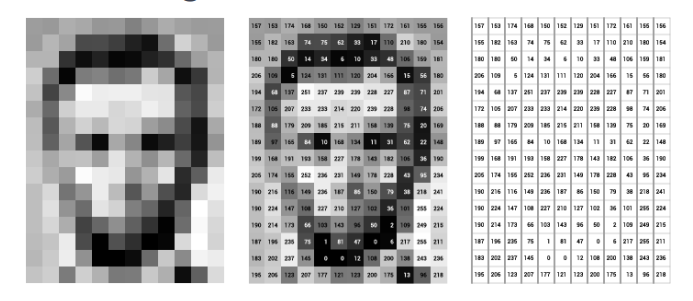

Sumber: https://miro.medium.com/max/693/1*bV7S0zACdidh11ikjYpLpQ.png




# **PCA**



Selain untuk keperluan *dimensionality reduction*, PCA juga umum digunakan untuk visualisasi data. Terutama pada data yang tidak terstruktur dengan dimensi tinggi seperti data teks atau citra, PCA dapat digunakan untuk mereduksi dimensi ini.

## **A. Penerapan PCA secara Manual**

Secara umum, penerapan PCA secara manual untuk keperluan visualisasi dapat dilakukan dengan langkah-langkah berikut:

1.   *Load dataset*.
2.   Standarisasi data
3.   Hitung *covariance matrix*
4.   Hitung nilai eigen dan vektor eigen untuk memilih **2** komponen utama 
5.   Buat matriks proyeksi dari **2** vektor eigen yang dipilih.
6.   Subruang baru diperoleh dari perkalian dataset asli dengan  matriks proyeksi.
7.   Plot subruang baru

### **Step 1: Load dataset**

Pada tutorial kali ini kita akan menggunakan dataset MNIST. MNIST adalah dataset yang terdiri dari angka 0 sampai 9 yang ditulis oleh tangan. MNIST dataset terdiri dari 70000 gambar di mana setiap data gambar berukuran 28x28 pixel sehingga total terdapat 784 dimensi.

Contoh dataset MNIST

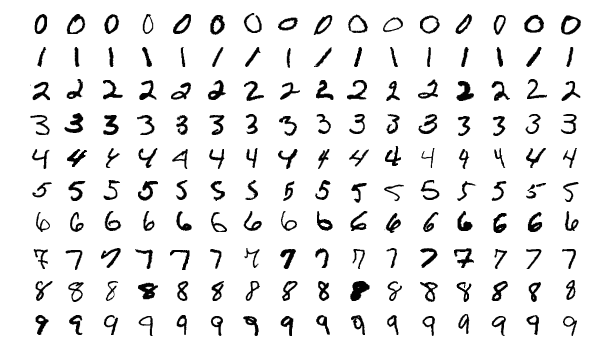

Sumber: https://commons.wikimedia.org/wiki/File:MnistExamples.png#/media/File:MnistExamples.png

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
X = mnist.data
labels = mnist.target

print("Dimensi data: ", X.shape)
print(fetch_openml)

KeyboardInterrupt: 

### **Step 2: Standardisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### **Step 3: Hitung *covariance matrix***

In [ ]:
import numpy as np

cov_mat = np.cov(X_std.T)

print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **Step 4: Hitung nilai eigen and vektor eigen untuk memilih 2 komponen utama**

 Karena dalam kasus ini PCA digunakan untuk visualisasi, kita hanya perlu memilih **2** komponen utama. Dengan demikian, kita pilih **2** vektor eigen yang sesuai dengan **2** nilai eigen terbesar.

In [ ]:
from scipy.linalg import eigh

# Fungsi eigh akan mengembalikan nilai eigen secara ascending
# Kode di bawah hanya menghasilkan 2 nilai eigen (782 dan 783)(indeks).
values, vectors = eigh(cov_mat, eigvals=(782,783))

### **Step 5: Buat matriks proyeksi dari 2 vektor eigen yang dipilih.**

In [ ]:
mat_proj = vectors
print("Dimensi matriks proyeksi: ", mat_proj.shape)

Dimensi matriks proyeksi:  (784, 2)


### **Step 6: Perkalian dataset asli dengan matriks proyeksi untuk memperoleh dataset baru**

In [ ]:
import matplotlib.pyplot as plt

new_coordinates = np.matmul(X_std, mat_proj)
new_coordinates.shape

(70000, 2)

### **Step 7: Plot subruang baru**

In [ ]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates.T, labels)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

  1st_principal 2nd_principal label
0      -4.92971      -0.89172     5
1      -7.51756       8.81353     0
2       9.82446       2.20484     4
3      -4.02967      -6.53463     1
4       3.27885      -5.25162     9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


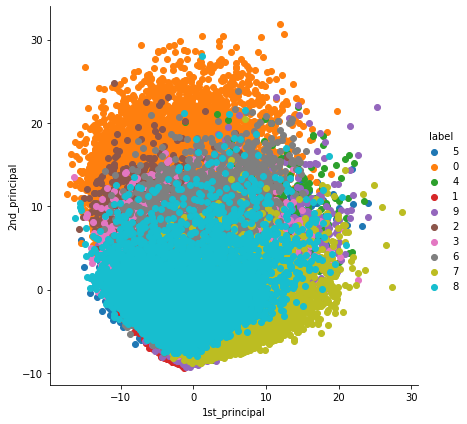

In [ ]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Dapat kita lihat bahwa, citra dari dataset MNIST yang direpresentasikan dengan vektor dimensi tinggi dapat dipetakan pada plot 2 dimensi dengan PCA. Kita dapat melihat persebaran dari dataset MNIST di mana pada beberapa label terdapat karakteristik tertentu, seperti pada label 0 yang memiliki `2nd_principal` relatif tinggi dibandin yang lain.

## **B. Penerapan PCA dengan library**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
skl_pca = pca.fit_transform(X_std)
skl_pca.shape

(70000, 2)

### **Visualisasi hasil PCA dengan library**

In [ ]:
import pandas as pd
skl_pca = np.vstack((skl_pca.T, labels)).T
dataframe = pd.DataFrame(data=skl_pca, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

  1st_principal 2nd_principal label
0     -0.891669      -4.92977     5
1        8.8135      -7.51769     0
2       2.20477       9.82507     4
3      -6.53465      -4.02982     1
4      -5.25161       3.27864     9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


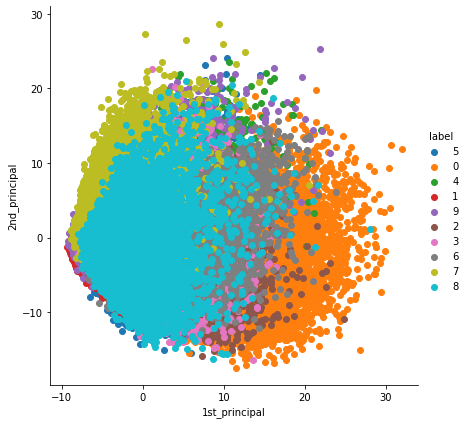

In [ ]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Hasil visualisasi dari library tidak berbeda jauh dengan step by step yang kita lakukan pada bagian sebelumnya. Perbedaan terdapat pada posisi dan arah tetapi bentuknya masih tetap sama.

# **t-SNE**

Pada bagian ini, kemungkinan program akan menjalankan t-SNE dalam waktu yang lama, yaitu sekitar 3 jam dengan menggunakan Google Colab. Jadi jangan panik dan luangkan waktu yang banyak untuk melihat "*magic*" nya ya :)

Disarankan untuk melakukan eksperimen pada parameter `perplexity` dan `n_iter` di `TSNE`. Parameter tersebut dapat mempengaruhi visualisasi dari dataset. Parameter yang dapat dicoba pada dataset MNIST adalah `perplexity=40, n_iter=300`

In [ ]:
from sklearn.manifold import TSNE

# Anda disarankan untuk mencoba-coba parameter perplexity dan n_iter seperti yang disebutkan di kelas
# Parameter
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_dv = tsne.fit_transform(X_std)
tsne_dv.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 20.947s...
[t-SNE] Computed neighbors for 70000 samples in 8930.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for

(70000, 2)

In [ ]:
import pandas as pd
tsne_dv = np.vstack((tsne_dv.T, labels)).T
dataframe = pd.DataFrame(data=tsne_dv, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

  1st_principal 2nd_principal label
0      -14.6362      -9.08895     5
1      -25.3465      -30.0722     0
2       43.2908      -26.3791     4
3      -20.6158       32.4327     1
4        44.013     -0.252298     9


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


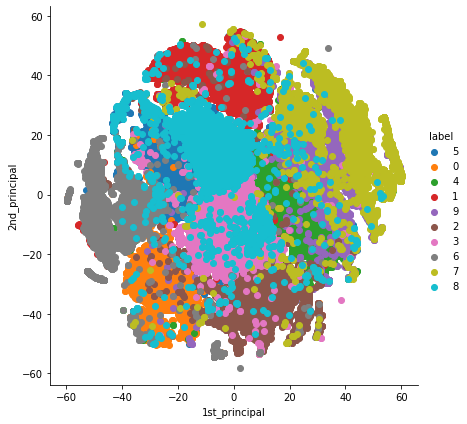

In [ ]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Kita dapat meningkatkan kualitas visualisasinya dengan melakukan eksperimen terhadap parameter dari `TSNE`.

Dari tutorial ini kita dapat melihat bahwa visualisasi yang dihasilkan oleh PCA kurang baik dalam membedakan semua digit. Hal ini terjadi karena PCA adalah proyeksi linier sehingga tidak dapat menangkap dependensi non-linier antar fitur.